#                                                    "Heart Attack Risk Prediction"


**Developed by:** Ashok, Manish\
**Date:** *12/25/2023*


Heart attack risk dataset has a lot of different details about people's health. There are **8763** records from patients all around the world in this dataset. It's like a big collection of information. The most important part is a yes-or-no answer about whether someone might be at risk of having a heart attack. This dataset is super useful for studying and predicting heart health, helping us find ways to keep our hearts healthy






In [ ]:
import pandas as pd
df = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(8763, 26)

In [ ]:
# Function to standardize column names in a DataFrame
def standardize_column_names(df):
    for column in df.columns:
        # Replace spaces with underscore and convert to lowercase
        df.rename(columns={column: column.replace(" ", "_").replace("-", "_").lower()}, inplace=True)
    return df


df = standardize_column_names(df)


In [ ]:
df.head()

,patient_id,age,sex,cholesterol,blood_pressure,heart_rate,diabetes,family_history,smoking,obesity,...,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.62,261404,31.25,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.96,285768,27.19,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.46,235282,28.18,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.65,125640,36.46,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.51,160555,21.81,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   patient_id                       8763 non-null   object 
 1   age                              8763 non-null   int64  
 2   sex                              8763 non-null   object 
 3   cholesterol                      8763 non-null   int64  
 4   blood_pressure                   8763 non-null   object 
 5   heart_rate                       8763 non-null   int64  
 6   diabetes                         8763 non-null   int64  
 7   family_history                   8763 non-null   int64  
 8   smoking                          8763 non-null   int64  
 9   obesity                          8763 non-null   int64  
 10  alcohol_consumption              8763 non-null   int64  
 11  exercise_hours_per_week          8763 non-null   float64
 12  diet                

In [ ]:
# check missing values
df.isnull().sum()

patient_id                         0
age                                0
sex                                0
cholesterol                        0
blood_pressure                     0
heart_rate                         0
diabetes                           0
family_history                     0
smoking                            0
obesity                            0
alcohol_consumption                0
exercise_hours_per_week            0
diet                               0
previous_heart_problems            0
medication_use                     0
stress_level                       0
sedentary_hours_per_day            0
income                             0
bmi                                0
triglycerides                      0
physical_activity_days_per_week    0
sleep_hours_per_day                0
country                            0
continent                          0
hemisphere                         0
heart_attack_risk                  0
dtype: int64

In [ ]:
# List of columns to replace spaces and dashes with underscores
columns_to_replace = ['country', 'continent', 'hemisphere']

# Iterate over each specified column
for col in columns_to_replace:
    # Replace spaces with underscores, and dashes with underscores in the selected column
    df[col] = df[col].str.replace(' ', '_').str.replace('-', '_')


In [ ]:
# List comprehension to create a list of columns excluding 'patient_id'
columns = [x for x in df.columns if x != 'patient_id']

# Iterate over each selected column
for col in columns:

    # Print the unique values in the current column
    print(col, ':', df[col].unique())

    # Print a separator line for better readability
    print('-' * 80)


age : [67 21 84 66 54 90 20 43 73 71 77 60 88 69 38 50 45 36 48 40 79 63 27 25
 86 42 52 29 30 47 44 33 51 70 85 31 56 24 74 72 55 26 53 46 57 22 35 39
 80 65 83 82 28 19 75 18 34 37 89 32 49 23 59 62 64 61 76 41 87 81 58 78
 68]
--------------------------------------------------------------------------------
sex : ['Male' 'Female']
--------------------------------------------------------------------------------
cholesterol : [208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 25

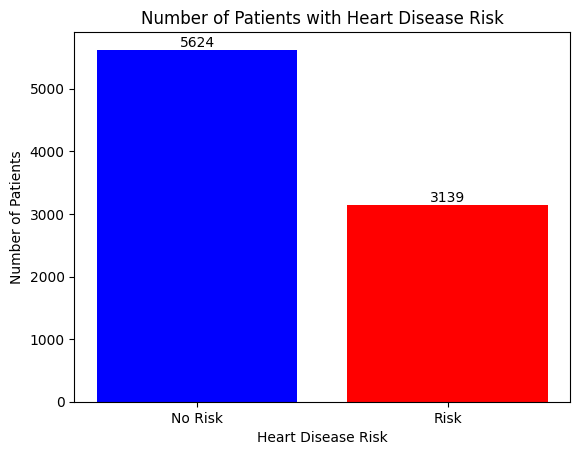

In [ ]:
# Count the occurrences of each value in 'Heart Attack Risk' column
heart_disease_counts = df['heart_attack_risk'].value_counts()

# Plot a bar chart
plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['blue', 'red'])

# Set x-axis ticks and labels
plt.xticks(heart_disease_counts.index, labels=['No Risk', 'Risk'])

# Set labels for x and y axes
plt.xlabel('Heart Disease Risk')
plt.ylabel('Number of Patients')

# Set the title of the plot
plt.title('Number of Patients with Heart Disease Risk')

# Add text annotations above each bar to display the count
for i, count in enumerate(heart_disease_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


In [ ]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
df.describe()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,medication_use,stress_level,sedentary_hours_per_day,income,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk
count,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00,8763.00
mean,53.71,259.88,75.02,0.65,0.49,0.90,0.50,0.60,10.01,0.50,0.50,5.47,5.99,158263.18,28.89,417.68,3.49,7.02,0.36
std,21.25,80.86,20.55,0.48,0.50,0.30,0.50,0.49,5.78,0.50,0.50,2.86,3.47,80575.19,6.32,223.75,2.28,1.99,0.48
min,18.00,120.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,20062.00,18.00,30.00,0.00,4.00,0.00
25%,35.00,192.00,57.00,0.00,0.00,1.00,0.00,0.00,4.98,0.00,0.00,3.00,3.00,88310.00,23.42,225.50,2.00,5.00,0.00
50%,54.00,259.00,75.00,1.00,0.00,1.00,1.00,1.00,10.07,0.00,0.00,5.00,5.93,157866.00,28.77,417.00,3.00,7.00,0.00
75%,72.00,330.00,93.00,1.00,1.00,1.00,1.00,1.00,15.05,1.00,1.00,8.00,9.02,227749.00,34.32,612.00,5.00,9.00,1.00
max,90.00,400.00,110.00,1.00,1.00,1.00,1.00,1.00,20.00,1.00,1.00,10.00,12.00,299954.00,40.00,800.00,7.00,10.00,1.00


In [ ]:
# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Extract the correlation of each feature with 'Heart Attack Risk'
correlation_with_target = correlation_matrix['heart_attack_risk'].abs().sort_values(ascending=False)

# Display the correlation values
print(correlation_with_target)


heart_attack_risk                 1.00
cholesterol                       0.02
sleep_hours_per_day               0.02
diabetes                          0.02
alcohol_consumption               0.01
obesity                           0.01
exercise_hours_per_week           0.01
triglycerides                     0.01
income                            0.01
age                               0.01
sedentary_hours_per_day           0.01
physical_activity_days_per_week   0.01
heart_rate                        0.00
stress_level                      0.00
smoking                           0.00
medication_use                    0.00
family_history                    0.00
previous_heart_problems           0.00
bmi                               0.00
Name: heart_attack_risk, dtype: float64


<ipython-input-76-6089332c9f71>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


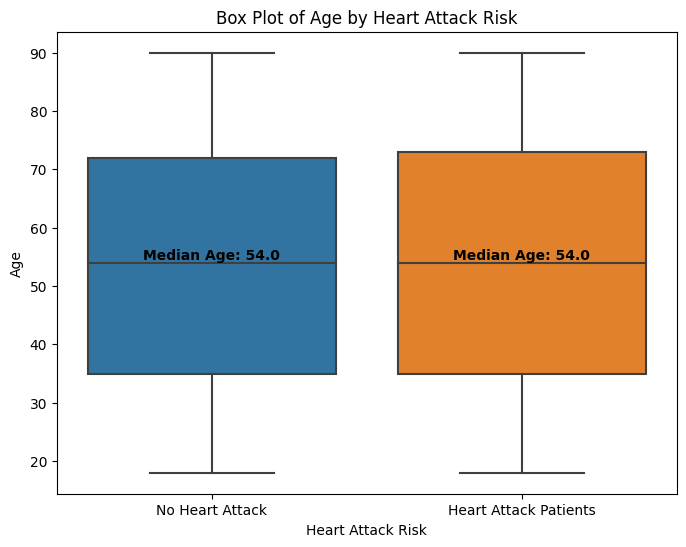

In [ ]:
# Create separate DataFrames for patients with and without heart attack risk
heart_attack_patients = df[df['heart_attack_risk'] == 1]
no_heart_attack_patients = df[df['heart_attack_risk'] == 0]


# Create a box plot to compare median ages
plt.figure(figsize=(8, 6))
sns.boxplot(x='heart_attack_risk', y='age', data=df)
plt.xlabel('Heart Attack Risk')
plt.ylabel('Age')
plt.title('Box Plot of Age by Heart Attack Risk')
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack Patients'])

# Add annotations for median ages
medians = df.groupby('heart_attack_risk')['age'].median()
medians_labels = [f'Median Age: {medians[0]}', f'Median Age: {medians[1]}']
for i, median in enumerate(medians):
    plt.text(i, median, medians_labels[i], ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()


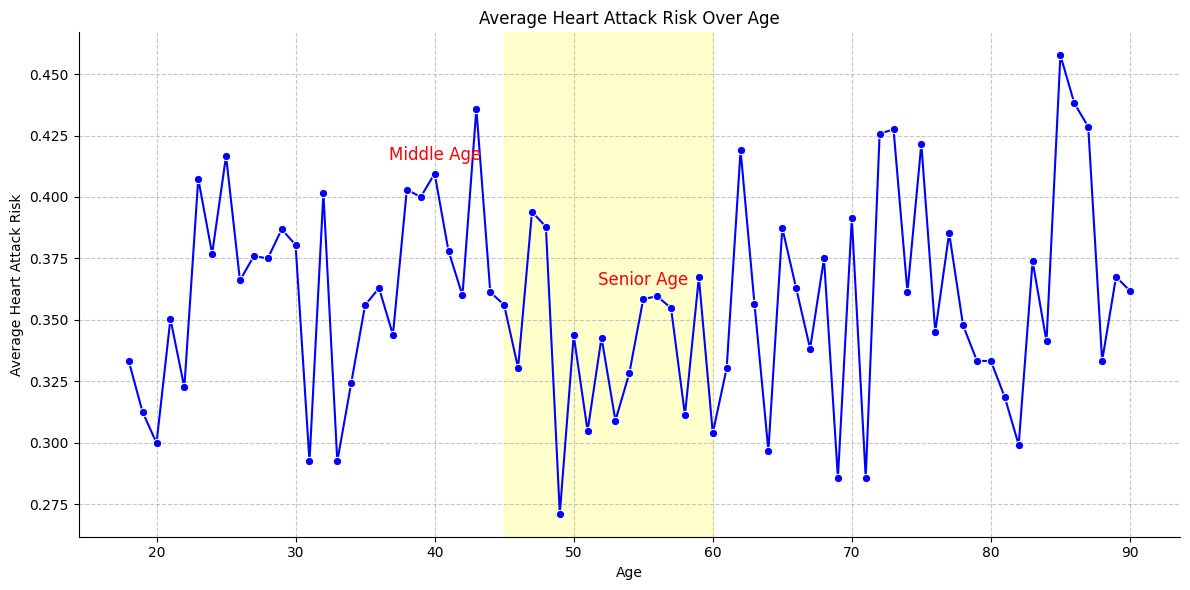

In [ ]:
# Group data by 'Age' and calculate the average heart attack risk for each age group
average_heart_attack_risk = df.groupby('age')['heart_attack_risk'].mean()

# Create a figure and axes
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot the data
sns.lineplot(x=average_heart_attack_risk.index, y=average_heart_attack_risk.values, marker='o', color='b', ax=ax)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Average Heart Attack Risk')
plt.title('Average Heart Attack Risk Over Age')
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

# Add labels for interesting points
interesting_points = [(40, "Middle Age"), (55, "Senior Age")]
for x, label in interesting_points:
    y_value = average_heart_attack_risk[x]
    ax.annotate(f'{label}', (x, y_value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='r')

# Highlight a specific age range
highlight_age_range = (45, 60)
plt.axvspan(*highlight_age_range, alpha=0.2, color='yellow')

# Customize the x-axis ticks
plt.xticks(range(20, 100, 10))

# Show the plot
plt.tight_layout()
plt.show()

**Objective 2: Life Style factors** \
Here, I am considering lifestyle factors are :\

1.   smoking
2.   alcohol_consumption







**Step 1:** Visualizing how `'smoking'` and `'alcohol_consumption'` values are affecting the heart attack risk.

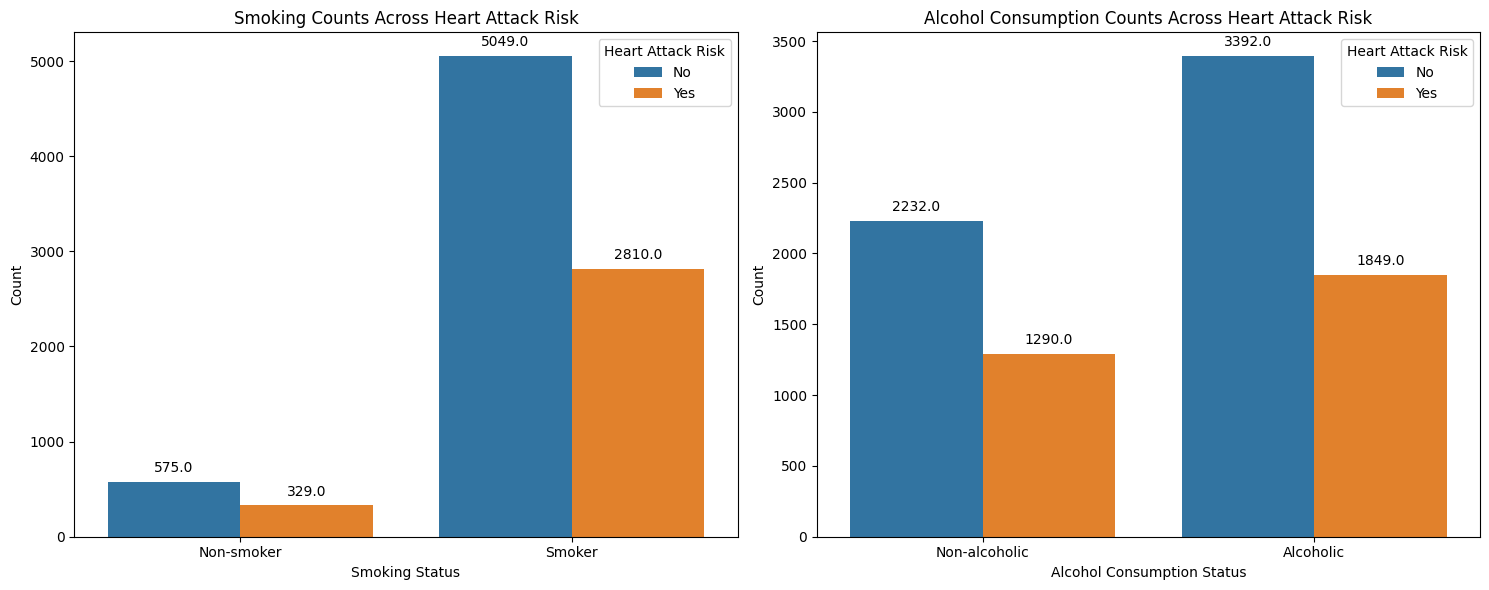

In [ ]:
# Define the lifestyle columns and their corresponding mappings
lifestyle_factors = [
    {'column': 'smoking',
     'labels': {0: 'Non-smoker', 1: 'Smoker'},
     'title': 'Smoking Counts Across Heart Attack Risk'},
    {'column': 'alcohol_consumption',
     'labels': {0: 'Non-alcoholic', 1: 'Alcoholic'},
     'title': 'Alcohol Consumption Counts Across Heart Attack Risk'}
]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(lifestyle_factors), figsize=(15, 6))

# Iterate over each lifestyle factor
for i, factor in enumerate(lifestyle_factors):

    # Plot counts for the current factor
    counts = df.groupby([factor['column'], 'heart_attack_risk']).size().reset_index(name='Count')
    counts['Factor Status'] = counts[factor['column']].map(factor['labels'])
    counts['Heart Attack Risk'] = counts['heart_attack_risk'].map({0: 'No', 1: 'Yes'})
    sns.barplot(x='Factor Status', y='Count', hue='Heart Attack Risk', data=counts, ax=axes[i])

    # Set labels and title for the subplot
    axes[i].set_xlabel(factor['column'].replace('_', ' ').title() + ' Status')
    axes[i].set_ylabel('Count')
    axes[i].set_title(factor['title'])

    # Display count values on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


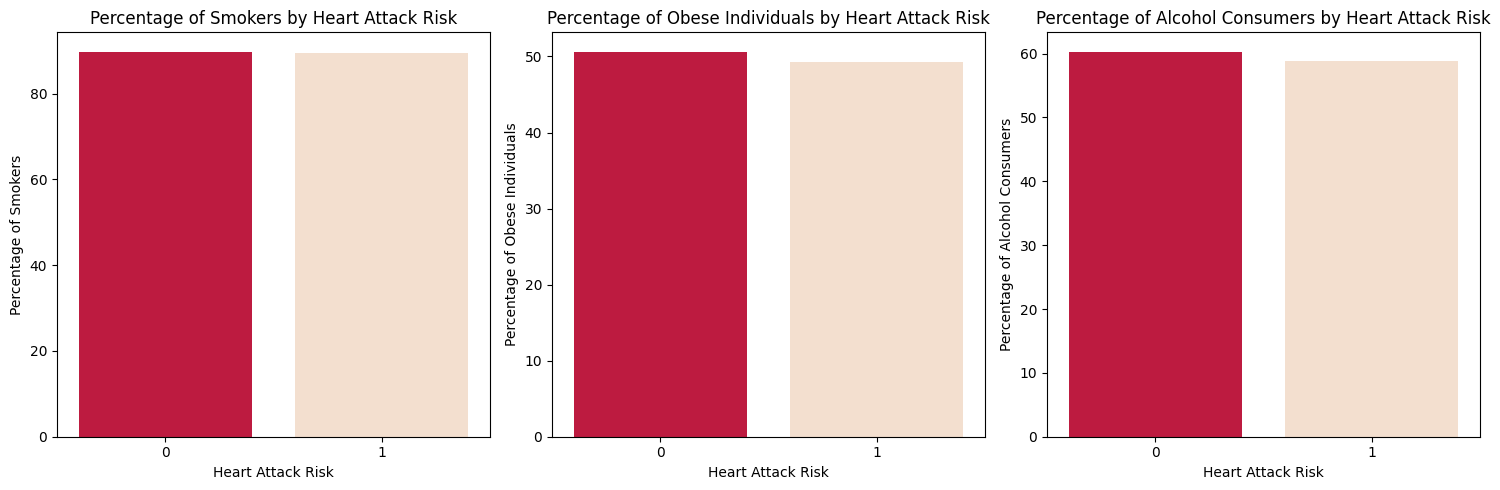

In [ ]:
# Calculate percentages of smokers, obese individuals, and alcohol consumption levels by heart attack risk
smoking_percentage = df.groupby('heart_attack_risk')['smoking'].mean() * 100
obesity_percentage = df.groupby('heart_attack_risk')['obesity'].mean() * 100
alcohol_percentage = df.groupby('heart_attack_risk')['alcohol_consumption'].mean() * 100

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar chart for smoking
sns.barplot(x=smoking_percentage.index, y=smoking_percentage.values, ax=axes[0], palette=['#D80032', '#F9DEC9'])
axes[0].set_title('Percentage of Smokers by Heart Attack Risk')
axes[0].set_xlabel('Heart Attack Risk')
axes[0].set_ylabel('Percentage of Smokers')

# Bar chart for obesity
sns.barplot(x=obesity_percentage.index, y=obesity_percentage.values, ax=axes[1], palette=['#D80032', '#F9DEC9'])
axes[1].set_title('Percentage of Obese Individuals by Heart Attack Risk')
axes[1].set_xlabel('Heart Attack Risk')
axes[1].set_ylabel('Percentage of Obese Individuals')

# Bar chart for alcohol consumption
sns.barplot(x=alcohol_percentage.index, y=alcohol_percentage.values, ax=axes[2], palette=['#D80032', '#F9DEC9'])
axes[2].set_title('Percentage of Alcohol Consumers by Heart Attack Risk')
axes[2].set_xlabel('Heart Attack Risk')
axes[2].set_ylabel('Percentage of Alcohol Consumers')

plt.tight_layout()
plt.show()

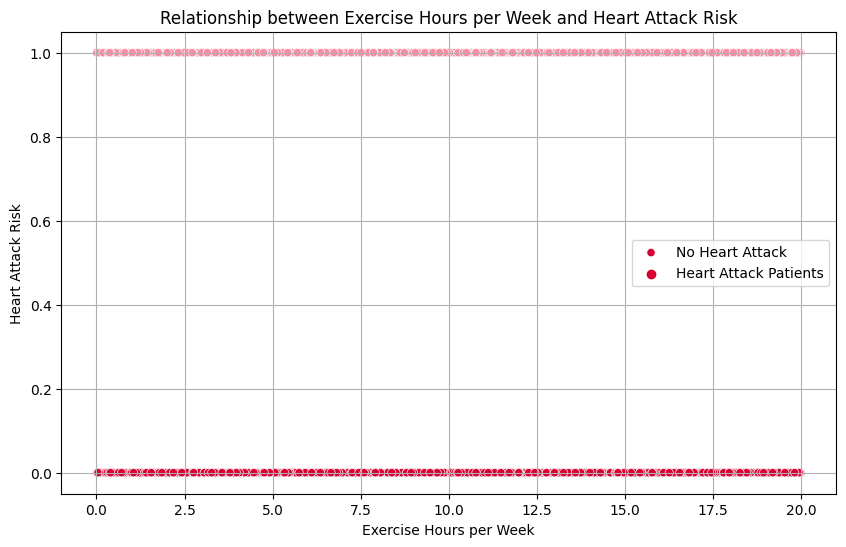

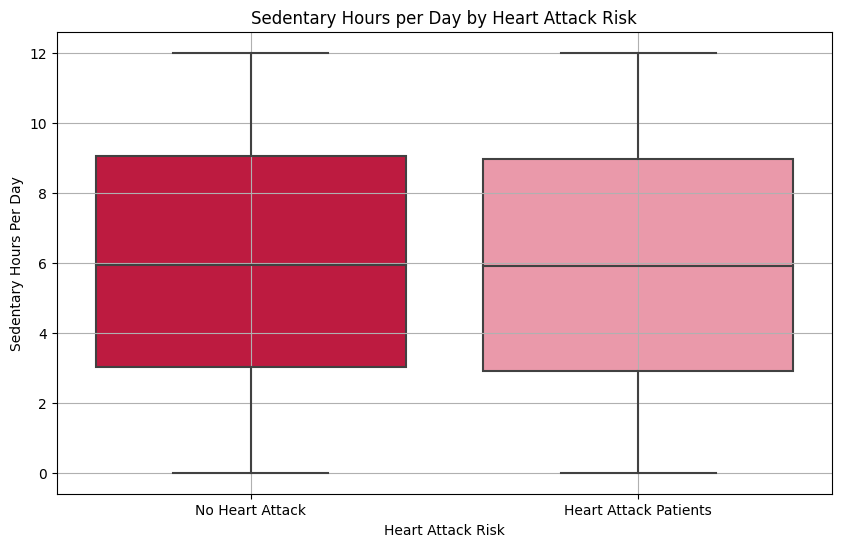

In [ ]:
# Scatter plot for Exercise Hours per Week
plt.figure(figsize=(10, 6))
sns.scatterplot(x='exercise_hours_per_week', y='heart_attack_risk', data=df, hue='heart_attack_risk', palette=['#D80032', '#F78CA2'])
plt.title('Relationship between Exercise Hours per Week and Heart Attack Risk')
plt.xlabel('Exercise Hours per Week')
plt.ylabel('Heart Attack Risk')
plt.legend(['No Heart Attack', 'Heart Attack Patients'])
plt.grid(True)
plt.show()

# Box plot for Sedentary Hours per Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_attack_risk', y='sedentary_hours_per_day', data=df, palette=['#D80032', '#F78CA2'])
plt.title('Sedentary Hours per Day by Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Sedentary Hours Per Day')
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack Patients'])
plt.grid(True)
plt.show()


**Objective 3. Demographic Pattern**



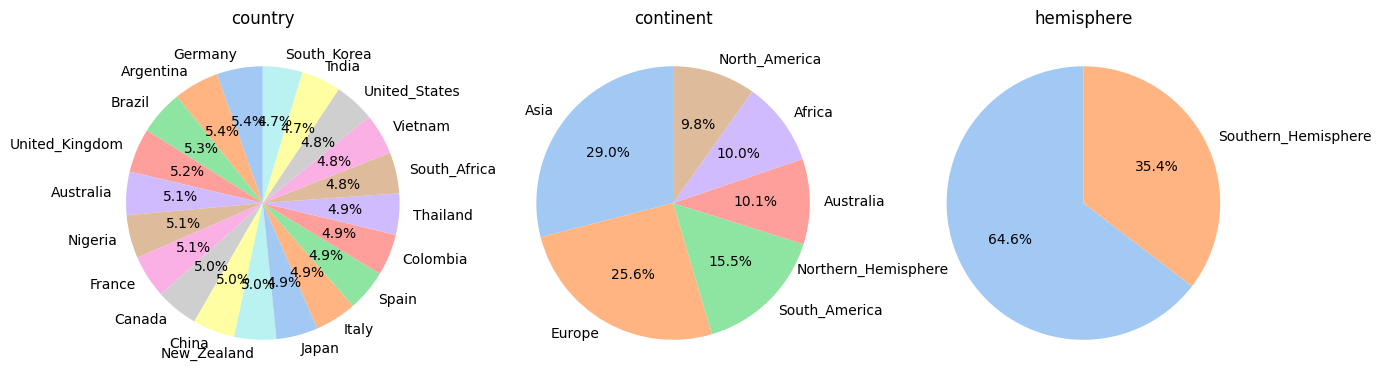

In [ ]:
categorical_columns = ['country', 'continent', 'hemisphere']

# Set up the number of rows and columns for subplots
num_rows = len(categorical_columns) // 3 + (len(categorical_columns) % 3 > 0)
num_cols = min(3, len(categorical_columns))

# Set up the figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Loop through each categorical column and create a pie chart
for i, column in enumerate(categorical_columns):
    # Count the occurrences of each category
    counts = df[column].value_counts()

    # Plot a pie chart
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[i].set_title(column)

# Remove empty subplots if there are any
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.show()

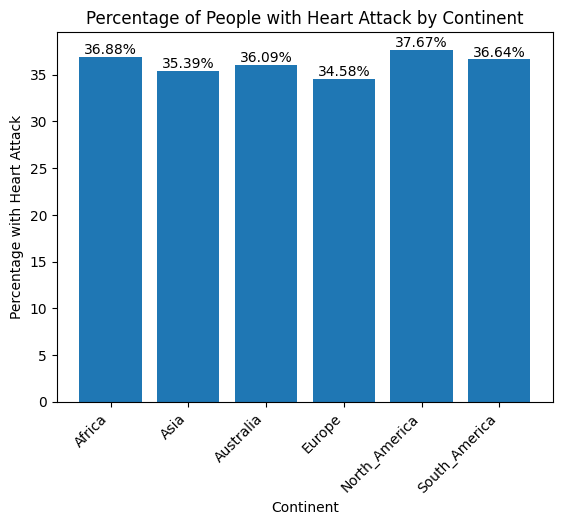

In [ ]:
# Calculate the percentage of people with a heart attack by continent
percentage_by_continent = df.groupby('continent')['heart_attack_risk'].mean() * 100

# Plot the bar graph
plt.bar(percentage_by_continent.index, percentage_by_continent.values)

# Add data values on top of each bar
for index, value in enumerate(percentage_by_continent.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Continent')
plt.ylabel('Percentage with Heart Attack')
plt.title('Percentage of People with Heart Attack by Continent')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


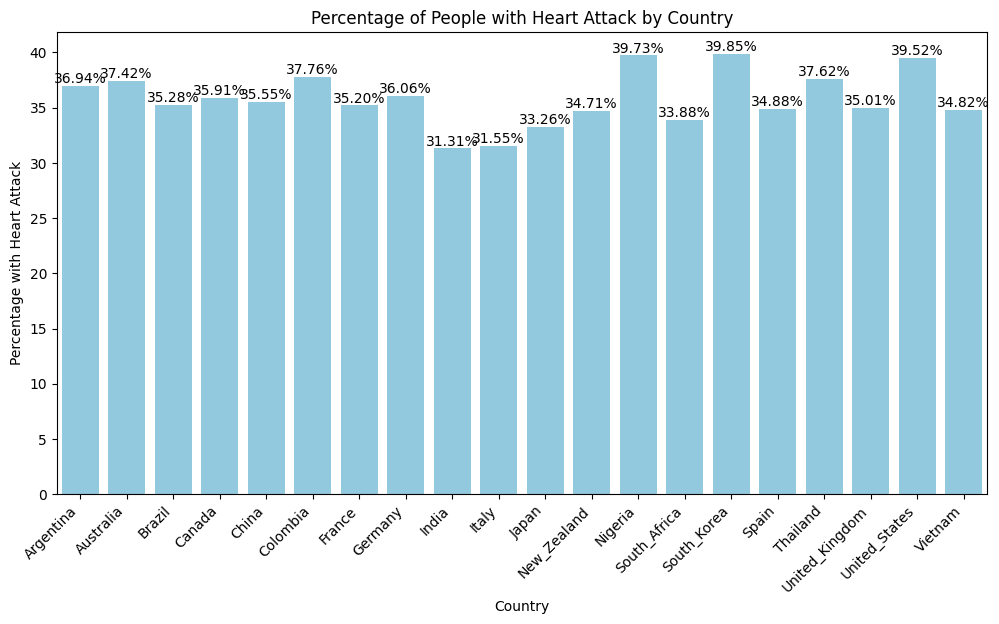

In [ ]:
# Calculate the percentage of people with a heart attack by country
percentage_by_country = df.groupby('country')['heart_attack_risk'].mean() * 100

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_by_country.index, y=percentage_by_country.values, color='skyblue')

# Add data values on top of each bar
for index, value in enumerate(percentage_by_country.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Percentage with Heart Attack')
plt.title('Percentage of People with Heart Attack by Country')
plt.xticks(rotation=45, ha='right')
plt.show()


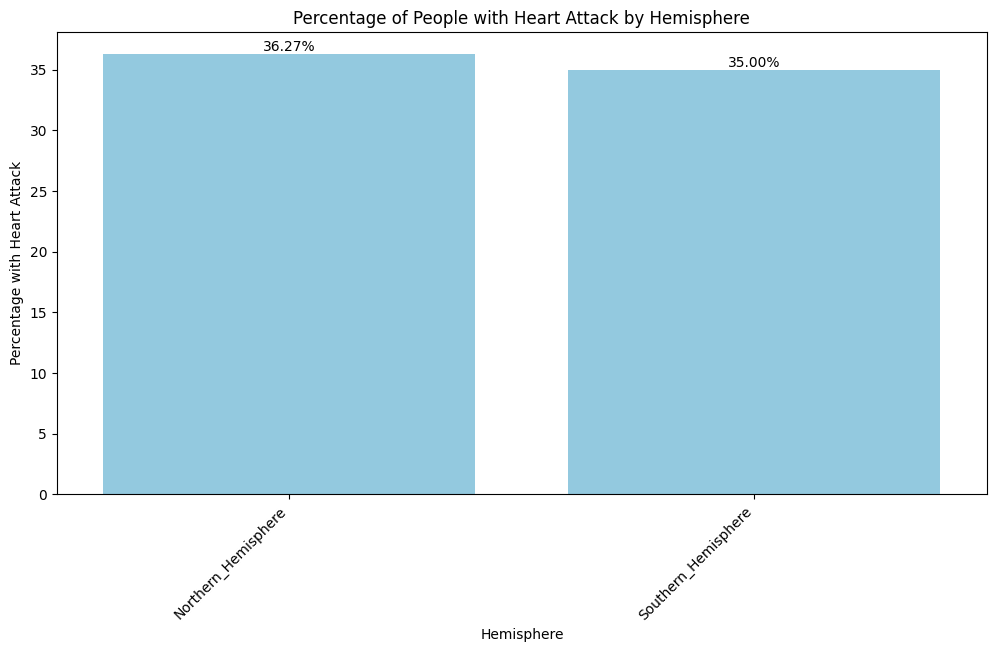

In [ ]:
# Calculate the percentage of people with a heart attack by country
percentage_by_country = df.groupby('hemisphere')['heart_attack_risk'].mean() * 100

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=percentage_by_country.index, y=percentage_by_country.values, color='skyblue')

# Add data values on top of each bar
for index, value in enumerate(percentage_by_country.values):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xlabel('Hemisphere')
plt.ylabel('Percentage with Heart Attack')
plt.title('Percentage of People with Heart Attack by Hemisphere')
plt.xticks(rotation=45, ha='right')
plt.show()

**Object 4: Medical History Contribution**


In [ ]:
# Constructing a pivot table
pivot_table = pd.pivot_table(df, values='heart_attack_risk',
                             index=['family_history', 'previous_heart_problems', 'obesity','diabetes'],
                             aggfunc='mean')

print(pivot_table)


                                                         heart_attack_risk
family_history previous_heart_problems obesity diabetes                   
0              0                       0       0                      0.38
                                               1                      0.38
                                       1       0                      0.32
                                               1                      0.36
               1                       0       0                      0.35
                                               1                      0.38
                                       1       0                      0.33
                                               1                      0.35
1              0                       0       0                      0.33
                                               1                      0.36
                                       1       0                      0.36
                         

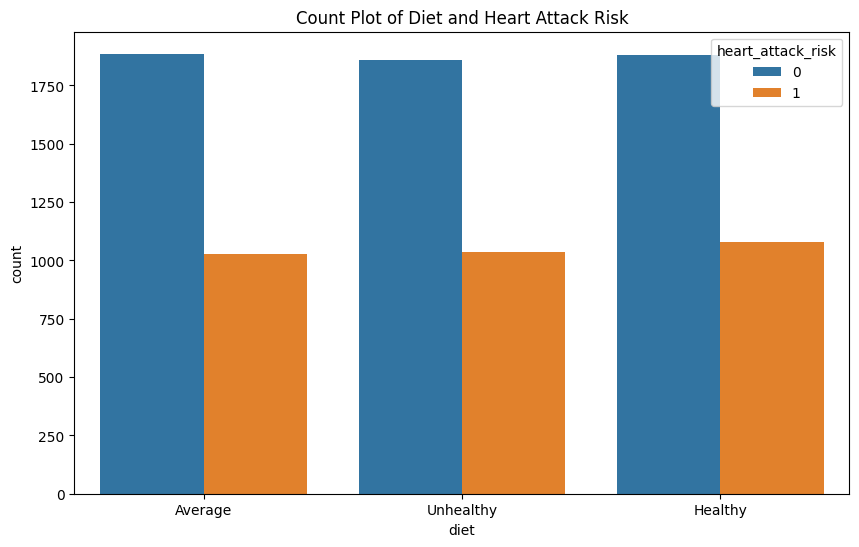

In [ ]:
# Count plot for Diet
plt.figure(figsize=(10, 6))
sns.countplot(x='diet', data=df, hue='heart_attack_risk')
plt.title('Count Plot of Diet and Heart Attack Risk')
plt.show()

 The American Heart Association (AHA) recommends performing at least 150 minutes of moderate-intensity aerobic activity per week or at least 75 minutes of vigorous aerobic activity per week. Other research shows that aerobic exercise is the most efficient form of exercise for improving measures of cardiometabolic health, including insulin sensitivity, glucose tolerance, and blood pressure.

The AHA recommends performing strengthening activities at least two days per week to help preserve and build lean muscle.

Therefore, consider 120 to 180 minutes of physical activity per week to be good for heart health. If the activity is less than 120 minutes (2 hours), we will consider it low. If the activity is more than 180 minutes (3 hours), we will consider it too large.

Let's create the feature "Physical activity group":

    0-119 minutes: low activity\
    120-180 minutes: normal activity\
    more 180 minutes: high activity

In [ ]:
def get_physical_activity_group(activity):

    # Convert hours to minutes and round to the nearest whole number
    activity_minutes = round(activity * 60)

    # Set the condition for creating a physical activity group
    if 0 <= activity_minutes <= 119:
        return 'low activity'
    elif 120 <= activity_minutes <= 180:
        return 'normal activity'
    elif activity_minutes > 180:
        return 'high activity'

df['physical_activity_group'] = df['exercise_hours_per_week'].apply(get_physical_activity_group)

In [ ]:
df['physical_activity_group'].value_counts()

high activity      7446
low activity        871
normal activity     446
Name: physical_activity_group, dtype: int64

In [ ]:
# group the heart attack risk data by physical activity group
activity = df.groupby(by='physical_activity_group',
                       as_index=False)['heart_attack_risk'].value_counts()

In [ ]:
# Create a cross-tabulation to analyze the relationship between physical activity group and heart attack risk
p_plt = pd.crosstab(index=df['physical_activity_group'], # Specify the column for rows
                     columns=df['heart_attack_risk'],
                     margins=True,
                     margins_name='Total',
                     normalize='index')

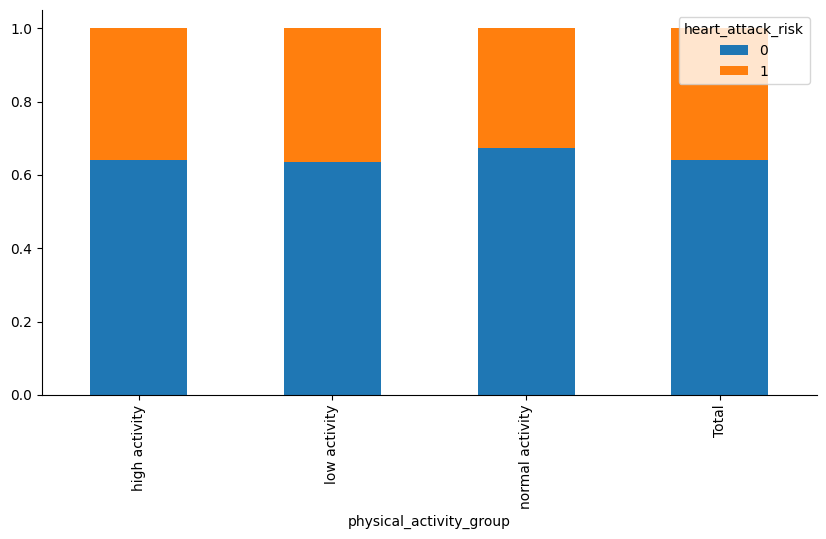

In [ ]:
# Plot a stacked bar chart based on the cross-tabulation
p_plt.plot.bar(stacked = True, figsize = (10, 5))
sns.despine()

In [ ]:
!jupyter nbconvert --to html /content/Final_Project_Manish_Ashok.ipynb

[NbConvertApp] Converting notebook /content/Final_Project_Manish_Ashok.ipynb to html
[NbConvertApp] Writing 1520902 bytes to /content/Final_Project_Manish_Ashok.html
